In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [2]:
raw_df = pd.read_spss("CY07_MSU_STU_COG_testlet.sav")

In [3]:
fil1 = raw_df.iloc[:, 13:65]
print(fil1.shape)
#print(raw_df.iloc[0, 13:65])

(6650, 52)


In [4]:
fil2 = fil1.replace(['Full credit', '1 - Full credit', '2 - Full credit', 'No credit', '0 - No credit'], [1, 1, 1, 0, 0])
#print(fil2)

In [5]:
fil3 = fil2.drop('CM955Q03S', axis=1)
fil4 = fil3.dropna(how='all')
#print(fil4)

In [6]:
stud_AR = fil4.mean(axis=1)
prob_AR = fil4.mean(axis=0)
print("Each student's Answer Rates: ", stud_AR)
print("Answer Rates for each Items: ", prob_AR)

Each student's Answer Rates:  0       0.812500
3       0.687500
5       0.647059
6       0.555556
7       0.733333
          ...   
6642    0.625000
6646    0.333333
6647    0.823529
6648    0.272727
6649    0.470588
Length: 2727, dtype: float64
Answer Rates for each Items:  CM033Q01S    0.817402
CM474Q01S    0.783784
CM155Q01S    0.794776
CM155Q04S    0.565594
CM411Q01S    0.564557
CM411Q02S    0.523632
CM803Q01S    0.340050
CM442Q02S    0.440568
CM034Q01S    0.441250
CM305Q01S    0.427689
CM496Q01S    0.533742
CM496Q02S    0.760652
CM423Q01S    0.818627
CM192Q01S    0.527881
CM603Q01S    0.350311
CM571Q01S    0.530075
CM564Q01S    0.613776
CM564Q02S    0.466830
CM447Q01S    0.853301
CM273Q01S    0.478528
CM408Q01S    0.411980
CM420Q01S    0.278388
CM446Q01S    0.819427
CM559Q01S    0.766871
CM828Q03S    0.161111
CM464Q01S    0.450932
CM800Q01S    0.963370
CM982Q01S    0.798017
CM982Q02S    0.489362
CM982Q03S    0.692308
CM982Q04S    0.562035
CM992Q01S    0.788875
CM992Q02S    0.29343

In [7]:
columcolum = fil4.columns
rowscolumns = fil4.shape
print(columcolum, rowscolumns)

Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object') (2727, 51)


In [8]:
# DataFrame to Numpy
# 'NaN' 자리 찾기 위한 대조군 역할
num_df = fil4.to_numpy()
print(num_df)

# Data shape
rows, columns = num_df.shape
print(rows, columns)

# Data show all
#np.set_printoptions(threshold=np.inf, linewidth=np.inf)
#print(num_df)

[[nan nan nan ... nan nan nan]
 [nan nan nan ...  1. nan  1.]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ...  1.  0.  1.]
 [nan nan nan ...  1. nan  0.]
 [ 0.  1.  1. ... nan nan nan]]
2727 51


In [9]:
# 1, 0 calibration for reasonable result

scarub = np.where(num_df > 0.99, 0.99, num_df)
scourge = np.where(scarub < 0.01, 0.01, scarub)
num_np = scourge
print(num_np)

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ... 0.99  nan 0.99]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ... 0.99 0.01 0.99]
 [ nan  nan  nan ... 0.99  nan 0.01]
 [0.01 0.99 0.99 ...  nan  nan  nan]]


In [10]:
# 개인 정답률 weight default값 도입
w_np = np.ones((columns,1))
p_df = pd.DataFrame(num_np)

# 개인 정답률 도출(가로합) -> '초과정답률'로 정정
p_solves = p_df.notnull().sum(1)  # 일단 이건 DataFrame 형태

p_noN = p_df.fillna(0)
p_noN_np = p_noN.to_numpy()
p_reduct = np.dot(p_noN_np, w_np)

p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성

row_prob = p_reduct / p_solT   # 초기조건 (default w로 설정한 값); numpy 형태

print("각 학생 정답률")
print(row_prob)

# 각 문항 당 정답률 도출(세로합)
col_prob_1 = prob_AR.to_numpy()
col_prob = np.array([col_prob_1])
print("각 문제 정답률")
print(col_prob)

각 학생 정답률
[[0.80625   ]
 [0.68375   ]
 [0.64411765]
 ...
 [0.81705882]
 [0.27727273]
 [0.47117647]]
각 문제 정답률
[[0.81740196 0.78378378 0.79477612 0.56559406 0.56455696 0.52363184
  0.34005038 0.44056848 0.44125    0.4276885  0.53374233 0.76065163
  0.81862745 0.52788104 0.35031056 0.53007519 0.61377614 0.46683047
  0.85330073 0.47852761 0.41198044 0.27838828 0.81942715 0.76687117
  0.16111111 0.45093168 0.96336996 0.79801735 0.4893617  0.69230769
  0.56203474 0.78887484 0.29343629 0.67964824 0.82637076 0.5825
  0.86402967 0.5752754  0.42911392 0.8097561  0.7        0.11994949
  0.45756458 0.808933   0.85607009 0.3        0.79691517 0.2979021
  0.639201   0.20717781 0.62041885]]


In [11]:
print(row_prob)

# 개인 능력치 theta 도출
theta = np.log(row_prob/(1-row_prob))                # 초기 theta값: w에서 유래한 theta
print(theta)

[[0.80625   ]
 [0.68375   ]
 [0.64411765]
 ...
 [0.81705882]
 [0.27727273]
 [0.47117647]]
[[ 1.4258252 ]
 [ 0.77105931]
 [ 0.59328118]
 ...
 [ 1.49654643]
 [-0.95803034]
 [-0.11542209]]


In [12]:
# 문항 난이도 beta 도출
beta0 = np.log(col_prob/(1-col_prob))
#print(beta0)
#print(np.mean(beta0))
beta = np.mean(beta0) - beta0
print(beta)

[[-1.09391681 -0.88292736 -0.94903205  0.14102976  0.14524963  0.31032908
   1.06799665  0.64378218  0.64101746  0.69621521  0.26975215 -0.75132844
  -1.10214897  0.29328696  1.02260132  0.28448077 -0.05828618  0.53780021
  -1.35580043  0.49086936  0.76071127  1.35739732 -1.10754426 -0.78580065
   2.05491093  0.60183397 -2.86464201 -0.9690216   0.44748654 -0.40600329
   0.15550286 -0.91322963  1.28367974 -0.34722881 -1.15519437  0.07188229
  -1.44424345  0.10151901  0.69039416 -1.04349922 -0.44237093  2.39783545
   0.57507795 -1.03816503 -1.37809886  1.25222479 -0.96219752  1.26223488
  -0.16697101  1.74694846 -0.08639947]]


In [13]:
# 문항 변별도 alpha prior
alpha = np.ones((1,columns))
print(alpha)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1.]]


In [14]:
# 각 성분별 P값 도출 (실험군)
ex_prob = np.exp(alpha * (theta - beta))/(1+np.exp(alpha * (theta - beta)))
#print(ex_prob)

In [29]:
# Learning Rate 설정
A = 0.0016

In [16]:
# 결측치 반영한 P 행렬 도출
ex_prob_real_e = ex_prob.copy()

for n in range(ex_prob.shape[0]):
    for m in range(ex_prob.shape[1]):
        if np.isnan(num_df[n][m]):
            ex_prob_real_e[n][m] = np.nan
            
scarub_e = np.where(ex_prob_real_e >= 1, 0.99, ex_prob_real_e)
scourge_e = np.where(scarub_e <= 0, 0.01, scarub_e)
ex_prob_real = scourge_e                                    # 0 혹은 1 양극단 삭제
print(ex_prob_real)


[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.71870162        nan 0.70212945]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.84070961 0.43772455 0.82962133]
 [       nan        nan        nan ... 0.31194126        nan 0.29491507]
 [0.72680943 0.68298099 0.6971177  ...        nan        nan        nan]]


In [17]:
ex_prob_pd = pd.DataFrame(ex_prob_real)
print(ex_prob_pd)

            0         1         2         3         4         5         6   \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2722       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2723  0.602462  0.551008  0.567301  0.305931  0.305035  0.271206  0.148530   
2724       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2725       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2726  0.726809  0.682981  0.697118  0.436236  0.435199  0.395141  0.234438   

            7         8         9   ...        41        42    

In [18]:
# Kullbeck Leibler Divergence값 도출

# 각 사람이 각 문제에 대한 KLD 도출
KLD_indiv = num_np * np.log(num_np / ex_prob_real) + (1 - num_np) * np.log((1 - num_np) / (1 - ex_prob_real))
print(KLD_indiv)

# NaN 쌈싸먹기 위한 dataframe 변환 후 제자리
KLD_indiv_df = pd.DataFrame(KLD_indiv)
KLD_NaNga_df = KLD_indiv_df.fillna(0)
KLD_NaNga_np = KLD_NaNga_df.to_numpy()
print(KLD_NaNga_np)

# KLD 최초도출
KLD_RowSum = np.sum(KLD_NaNga_np, axis=1)
KLD_1 = np.sum(KLD_RowSum, axis=0)
print(KLD_1)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.28368777        nan 0.30621055]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.13414261 0.52226591 0.14661384]
 [       nan        nan        nan ... 1.10102826        nan 0.30215178]
 [1.2317992  0.33296178 0.31313559 ...        nan        nan        nan]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.28368777 0.         0.30621055]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.13414261 0.52226591 0.14661384]
 [0.         0.         0.         ... 1.10102826 0.         0.30215178]
 [1.2317992  0.33296178 0.31313559 ... 0.         0.         0.        ]]
17012.13750271576


In [19]:
# 인당 풀이 문제 수 나타내는 함수
def p_sol():
    
    p_solves = p_df.notnull().sum(1)
    p_sol = p_solves.to_numpy()
    p_solT = np.reshape(p_sol, (rows, 1))
    
    return p_solT

In [20]:
# 문제당 풀이 인원 수 나타내는 함수
def q_sol():
    
    q_solves = p_df.notnull().sum()
    q_sol = q_solves.to_numpy()
    q_solT = np.reshape(q_sol, (1, columns))
    
    return q_solT

In [21]:
# 각 학생의 각 문제 정답 기댓값 (모델로 계산)
# 비교대상은 num_df
# theta_let, beta_let, alpha_let은 np
def expect_model(alpha_let, beta_let, theta_let):
#    theta_T = np.transpose(theta_let)              # theta를 세로로 세우기
    
    exponet_neg = alpha_let * (beta_let - theta_let)
    before_nan = 1/ (1 + np.exp(exponet_neg))
    after_nan = before_nan.copy()
    
    for n in range(before_nan.shape[0]):
        for m in range(before_nan.shape[1]):
            if np.isnan(num_df[n][m]):
                after_nan[n][m] = np.nan
                
    scarub_e = np.where(after_nan >= 1, 0.99, after_nan)
    scourge_e = np.where(scarub_e <= 0, 0.01, scarub_e)
    result_e = scourge_e                                    # 0 혹은 1 양극단 삭제
    
    return result_e                              # numpy 형태로 return


In [22]:
# D_KL 미분계수 계산 시 공통부분을 계산하는 함수

def preprocess_diff(alpha_let, beta_let, theta_let):
    
    p_imu = expect_model(alpha_let, beta_let, theta_let)    # 그냥 p_imu 일일이 계산하기 귀찮아서... 일단 2D로 추출
    q_imu = num_df.copy()                                   # 얘는 그냥 대조군

    # 바로 p와 q 조합
    KLD_common = p_imu - q_imu   # 항상 우려먹을 공통부분: '사람 X 문항' 형태
    
    return KLD_common                   # 형태는 numpy array 2D -> num_df와 같은 형태

In [23]:
# alpha값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_alpha(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    expo = theta_let - beta_let                                         # matrix 하나 생성 (numpy 형태)
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = expo * common_unit                                   # 인원 summation 하기 전 (np)
    
    dmatrix_df = pd.DataFrame(delta_matrix)                              # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                   # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_alphak = delta_matrix2.sum(axis=0, keepdims = True)            # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    alpha_med = alpha_let - A * delta_alphak                             # Gradient Descent 방식으로 D_KL의 alpha 업데이트
    alpha_result = alpha_med
    
    # 결과값은 np 형태로 추출
    return alpha_result

In [24]:
# beta값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_beta(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)                    # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = (-1) * alpha_let * common_unit                                    # 인원 summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_betak = delta_matrix2.sum(axis=0, keepdims = True)                         # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    beta_med = beta_let - A * delta_betak                                            # Gradient Descent 방식으로 D_KL의 beta 업데이트
    beta_result = beta_med - np.mean(beta_med)
    
    # 결과값은 np 형태로 추출
    return beta_result

In [25]:
# theta값 갱신하는 함수
# update된 w 사용해서 직접 theta를 update 시킴. Gradient Discent 사용 안 함
# w_let은 np
def set_theta(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = alpha_let * common_unit                                           # summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_thetak = delta_matrix2.sum(axis=1, keepdims = True)   # summation 직후 (문제당 beta 맞추기 위한 summation)
        
    theta_result = theta_let - A * delta_thetak                 # Gradient Descent 방식으로 D_KL 업데이트
    
    # 결과값은 np 형태로 추출
    return theta_result

In [26]:
# D_KL값 도출하는 함수
# alpha_let, beta_let, theta_let, num_df_let 모두 np
def set_D_KL(alpha_let, beta_let, theta_let):
    
    P_imu = expect_model(alpha_let, beta_let, theta_let)
    Q_imu = num_np.copy()
    
    KLD_imu_np = Q_imu * np.log((Q_imu) / (P_imu)) + (1 - Q_imu) * np.log((1 - Q_imu)/(1 - P_imu))
    
    # 잠깐 df로 바꿔치기 (fillna 원툴)
    KLD_imu_df = pd.DataFrame(KLD_imu_np)
    KLD_shuttle = KLD_imu_df.fillna(0)
    KLD_imu = KLD_shuttle.to_numpy()
    
    D_KL_mu = KLD_imu.sum(axis=1)
    D_KL = D_KL_mu.sum(axis=0)
    
    return D_KL

In [30]:
alpha_test = alpha.copy()
beta_test = beta.copy()
# w_test = w_np.copy()
theta_test = theta.copy()
KLD_test = KLD_1.copy()
KLD_basket = []
KLD_basket.append(KLD_test)

In [31]:
# 본격 Iteration 굴리는 파트
limit = 820
for k in tqdm(range(limit)):
    # alpha값 갱신
    alpha_carrier = set_alpha(alpha_test, beta_test, theta_test)
    alpha_test = alpha_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # beta값 갱신
    beta_carrier = set_beta(alpha_test, beta_test, theta_test)
    beta_test = beta_carrier
    #print("%d 번째 Beta 값 = " % (k+1), beta_test)
    
    # theta값 갱신
    theta_carrier = set_theta(alpha_test, beta_test, theta_test)
    theta_test = theta_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)

    # Kullback-Leibler Divergence값 도출
    KLD_carrier = set_D_KL(alpha_test, beta_test, theta_test)
    #print("%d 번째 Kullback-Leibler Divergence 값 = " % (k+1), KLD_carrier)
    
    # 작업을 멈출지 말지 결정
    if (k < limit - 1) and (KLD_carrier < KLD_test):
        KLD_test = KLD_carrier
        KLD_basket.append(KLD_test)
    else:
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha 값 = ", alpha_test)
        print("최종 Beta 값 = ", beta_test)
        #print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta 값 = ", theta_test)
        break

 41%|████████████████████████████████▊                                               | 336/820 [04:09<05:59,  1.34it/s]

최종 ICC 변수 일람
최종 Kullback-Leibler Divergence 값 =  16199.887989221712
최종 Alpha 값 =  [[0.91903196 0.81596819 1.54345135 1.24975237 1.21563947 0.84762282
  2.10264756 1.78717523 1.28350686 0.27446507 1.82036511 1.34687873
  0.75129006 1.45054338 1.22219028 1.96936829 0.82994108 0.65015967
  1.40347465 1.02396026 1.70617491 0.67788568 1.54849008 1.65369768
  2.14313718 2.19753524 2.43253304 0.74595802 0.95052607 0.87894278
  1.69369435 1.97026559 2.01174325 0.91254095 1.50356368 1.86262847
  2.19941008 2.49608432 5.53633859 1.4977694  1.61673378 1.44409883
  0.42929688 0.8322427  1.50012963 1.21639531 2.07410373 2.27966328
  1.10919324 3.68199982 3.87934767]]
최종 Beta 값 =  [[-1.59729419 -1.48530429 -0.9004135   0.07120143  0.10325185  0.22795968
   0.90484189  0.5963425   0.60787904  1.43217809  0.2621694  -0.72978258
  -1.85813512  0.28179567  1.04869148  0.2868062  -0.26190537  0.61146025
  -1.28101738  0.51582492  0.72104411  1.95193565 -0.9206723  -0.64009763
   1.74108239  0.59072146 -1

In [32]:
print(KLD_basket)

[17012.13750271576, 16790.23930632429, 16679.623123093883, 16616.132369942534, 16574.94382378171, 16545.57589801677, 16523.256164006467, 16505.59549063847, 16491.259498821208, 16479.419191092176, 16469.512204635255, 16461.131988471527, 16453.97203246675, 16447.79508542858, 16442.414481324387, 16437.681819601617, 16433.478293245204, 16429.708303634456, 16426.294619859687, 16423.174640624493, 16420.297473464492, 16417.621634613948, 16415.11322736894, 16412.744492939124, 16410.49265316946, 16408.33898307692, 16406.268065069155, 16404.26718731394, 16402.325856875577, 16400.435404531127, 16398.588663065762, 16396.77970465072, 16395.00362587879, 16393.256371360585, 16391.534588614442, 16389.835508426484, 16388.156845998627, 16386.49671910928, 16384.853580232728, 16383.226160140046, 16381.61342096643, 16380.014517100974, 16378.428762554453, 16376.855603702636, 16375.294596498787, 16373.745387408599, 16372.207697450813, 16370.681308833004, 16369.166053759138, 16367.661805056978, 16366.16846833

In [33]:
KLD_s = pd.Series(KLD_basket)
#print(KLD_s)
KLD_s.to_csv("0606_(no)w_KLDs.csv")

## Parameter Normalization

In [33]:
theta1_mean = np.mean(theta_test)
theta1_std = np.std(theta_test)

In [38]:
theta1_norm = (theta_test - theta1_mean) / theta1_std

alpha1_norm = theta1_std * alpha_test

beta_norm = (beta_test - theta1_mean) / theta1_std

In [39]:
print(theta_test)
print(theta1_norm)

[[ 1.29939727]
 [ 0.76309678]
 [ 0.63376333]
 ...
 [ 1.23050117]
 [-1.14462119]
 [ 0.17108521]]
[[ 0.72977913]
 [ 0.29581539]
 [ 0.19116132]
 ...
 [ 0.67402977]
 [-1.24787226]
 [-0.18322867]]


In [40]:
print(expect_model(alpha_test, beta_test, theta_test))
print(expect_model(alpha1_norm, beta_norm, theta1_norm))

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.74621363        nan 0.93607982]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.82998287 0.33523321 0.99153979]
 [       nan        nan        nan ... 0.27076295        nan 0.00300416]
 [0.83483168 0.7934651  0.83846323 ...        nan        nan        nan]]
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.74621363        nan 0.93607982]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.82998287 0.33523321 0.99153979]
 [       nan        nan        nan ... 0.27076295        nan 0.00300416]
 [0.83483168 0.7934651  0.83846323 ...        nan        nan        nan]]


## Parameters Storage

In [55]:
theta1_norm_pd = pd.DataFrame(theta1_norm)

alpha1_norm_pd = pd.DataFrame(alpha1_norm)

beta_norm_pd = pd.DataFrame(beta_norm)

In [56]:
theta1_norm_pd.to_csv("theta_norm_T.csv")
alpha1_norm_pd.to_csv("alpha_norm.csv")
beta_norm_pd.to_csv("beta_norm.csv")

In [41]:
# Plotting 실시
alpha_1 = alpha1_norm.astype(float)
beta_1 = beta_norm.astype(float)
x1 = np.transpose(theta1_norm)
x2 = x1.reshape(-1,)
x = x2.astype(float)
#print(x)

In [42]:
Y_bar = pd.DataFrame(num_df)
Y_bar = Y_bar.transpose()
x_bar = pd.DataFrame(x)
x_bar = x_bar.transpose()

#ex_prob_realiz = expect_realization(ex_prob, num_df)
#print(ex_prob_realiz)

P_bar = pd.DataFrame(expect_model(alpha_test, beta_test, theta_test))
P_bar = P_bar.transpose()
DataSet = pd.concat([x_bar, P_bar, Y_bar])
DataSet = DataSet.transpose()
DataSet_np = DataSet.to_numpy()
DataSet_reset = pd.DataFrame(DataSet_np)
#print(DataSet.iloc[:, 0:5])
#print(DataSet_reset)
print(DataSet_reset[0])
#print(DataSet.shape)


0       0.729779
1       0.295815
2       0.191161
3      -0.171805
4       0.557345
          ...   
2722    0.203124
2723   -1.034252
2724    0.674030
2725   -1.247872
2726   -0.183229
Name: 0, Length: 2727, dtype: float64


In [43]:
print(DataSet_reset.columns)

RangeIndex(start=0, stop=103, step=1)


In [44]:
Data_carrier = DataSet_reset[0]
#print(Data_carrier)
Data_carrier.to_csv("Theta_no_w(norm).csv")

In [45]:
DataSet_Test = DataSet_reset.sort_values(0, ascending = True)
print(DataSet_Test)

           0         1         2         3         4         5         6    \
320  -4.149704  0.059460  0.076193  0.003004  0.002866       NaN       NaN   
1717 -4.148609  0.059528  0.076267  0.003010  0.002871  0.003025  0.017325   
739  -4.144687       NaN       NaN       NaN       NaN       NaN       NaN   
1083 -4.121400       NaN       NaN       NaN       NaN       NaN       NaN   
1053 -4.117189       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
449   3.523465       NaN       NaN       NaN       NaN       NaN       NaN   
1342  3.523465       NaN       NaN       NaN       NaN       NaN       NaN   
2482  3.523952  0.996716  0.992868  0.999818  0.996699  0.996226  0.975619   
2351  3.523952  0.996716  0.992868  0.999818  0.996699  0.996226  0.975619   
209   3.539546       NaN       NaN       NaN       NaN       NaN       NaN   

           7         8         9    ...  93   94   95   96   97

In [46]:
DataSet = DataSet_Test.reset_index(drop=True)
print(DataSet)

           0         1         2         3         4         5         6    \
0    -4.149704  0.059460  0.076193  0.003004  0.002866       NaN       NaN   
1    -4.148609  0.059528  0.076267  0.003010  0.002871  0.003025  0.017325   
2    -4.144687       NaN       NaN       NaN       NaN       NaN       NaN   
3    -4.121400       NaN       NaN       NaN       NaN       NaN       NaN   
4    -4.117189       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2722  3.523465       NaN       NaN       NaN       NaN       NaN       NaN   
2723  3.523465       NaN       NaN       NaN       NaN       NaN       NaN   
2724  3.523952  0.996716  0.992868  0.999818  0.996699  0.996226  0.975619   
2725  3.523952  0.996716  0.992868  0.999818  0.996699  0.996226  0.975619   
2726  3.539546       NaN       NaN       NaN       NaN       NaN       NaN   

           7         8         9    ...  93   94   95   96   97

In [47]:
print(columcolum)
print(columcolum.shape[0])
#print(cols_list)


Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object')
51


In [48]:
Tough = DataSet[[0, 6, 57]]
rough = Tough.dropna(axis=0)
print(rough)

            0         6    57
1    -4.148609  0.017325  0.0
9    -4.084349  0.018462  0.0
17   -2.706630  0.070054  0.0
19   -2.641055  0.074481  0.0
20   -2.633110  0.075034  0.0
...        ...       ...  ...
2707  3.495463  0.974927  1.0
2714  3.500738  0.975057  1.0
2715  3.500738  0.975057  1.0
2724  3.523952  0.975619  1.0
2725  3.523952  0.975619  1.0

[804 rows x 3 columns]


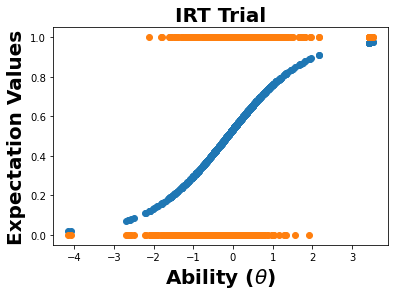

In [49]:
# Plotting Trial

Tough = DataSet[[0, 6, 57]]
rough = Tough.dropna(axis=0)

xs = rough[0].tolist()    # Theta Column
#print(xs)
ys = rough[6].tolist()    # CM411Q02S Column
#print(ys)
zs = rough[57].tolist()   # CM411Q02S Real df Column

plt.scatter(x=xs, y=ys)
plt.scatter(x=xs, y=zs)

plt.title('IRT Trial', fontdict={'weight': 'bold', 'size': 20})
plt.xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 20})
plt.ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 20})
plt.show()

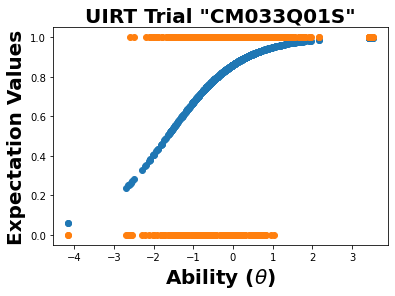

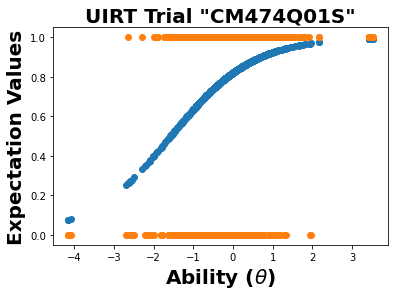

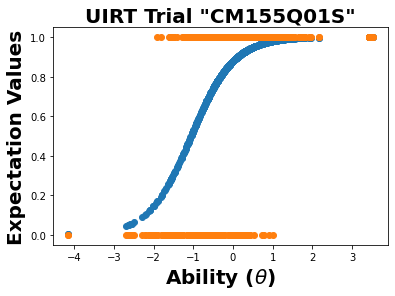

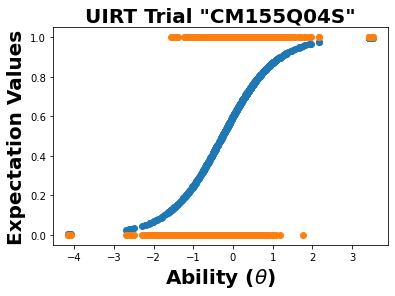

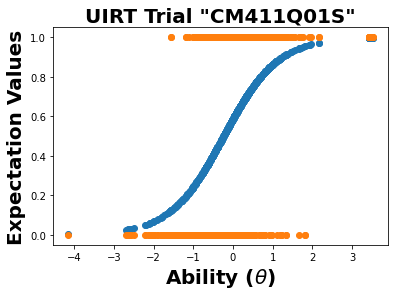

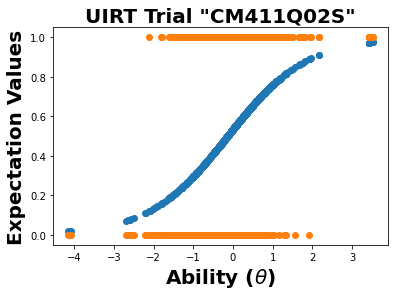

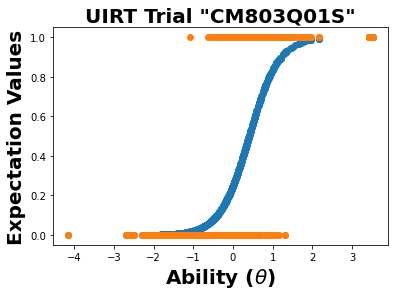

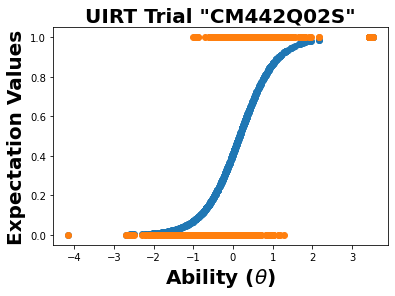

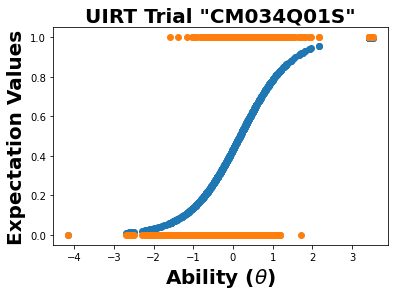

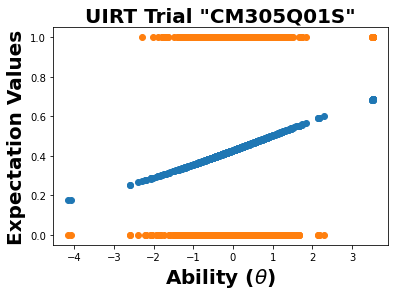

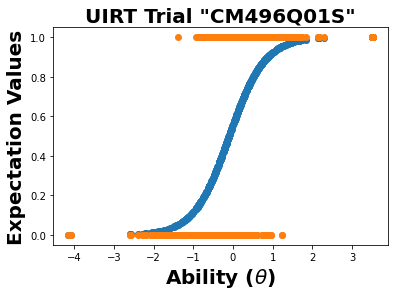

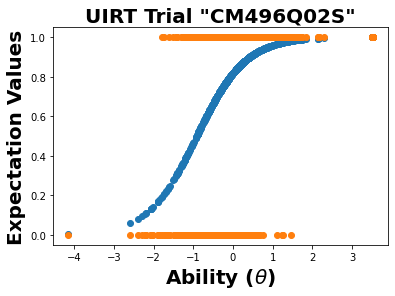

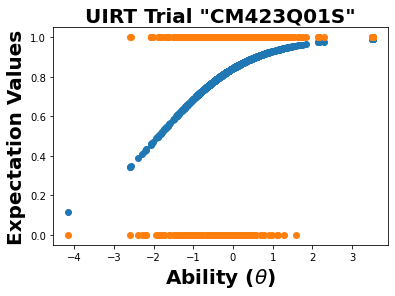

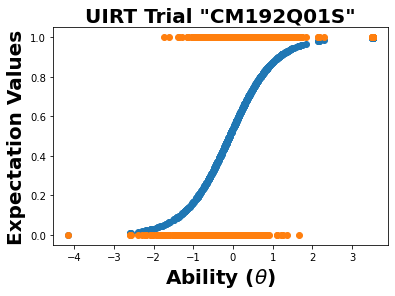

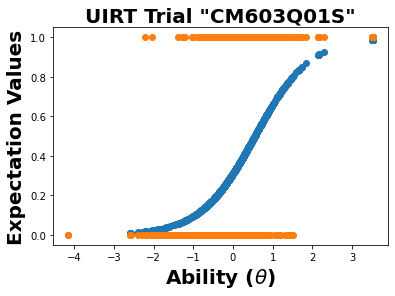

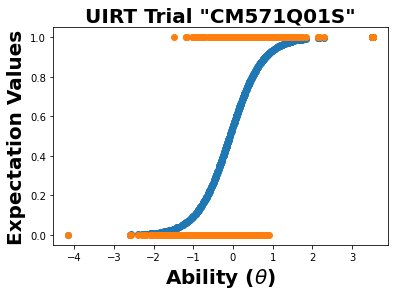

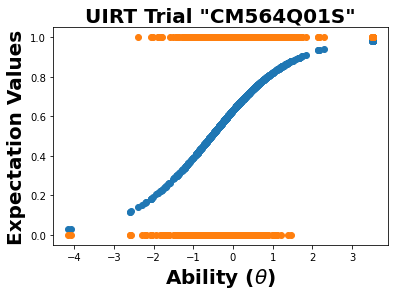

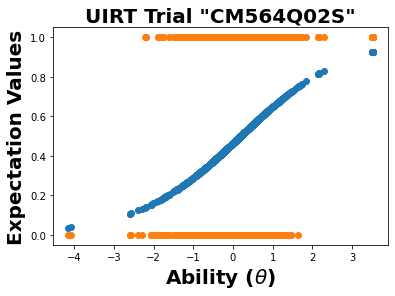

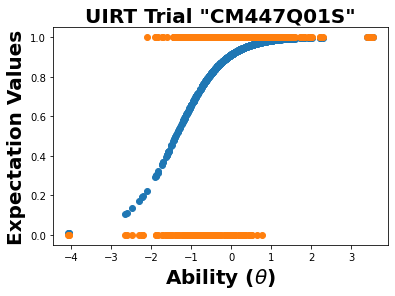

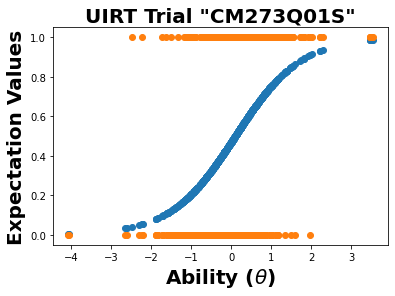

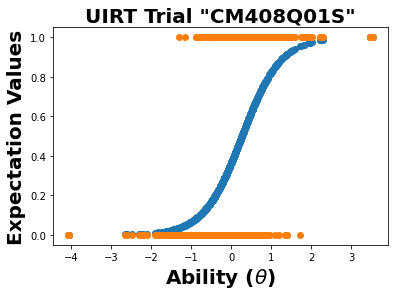

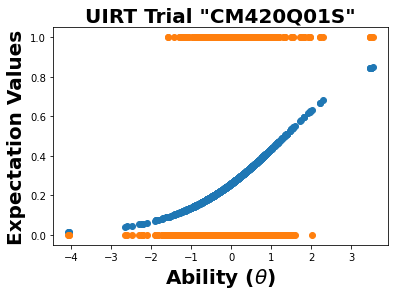

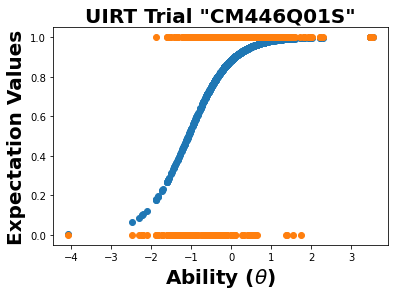

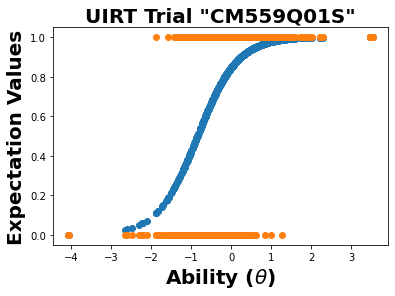

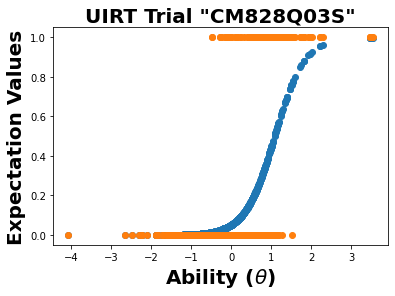

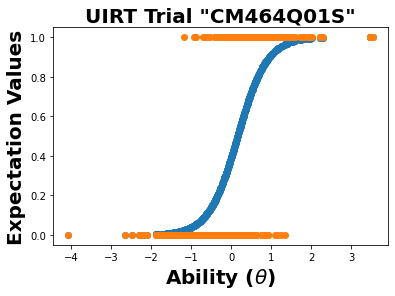

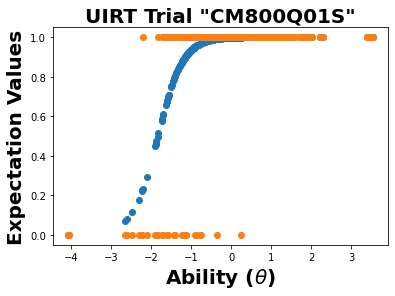

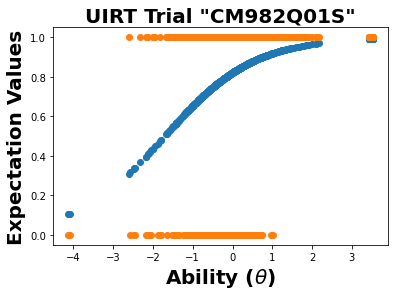

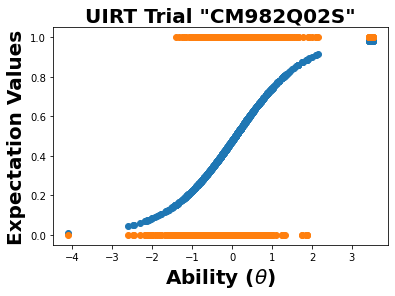

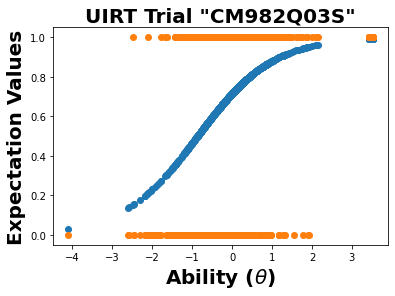

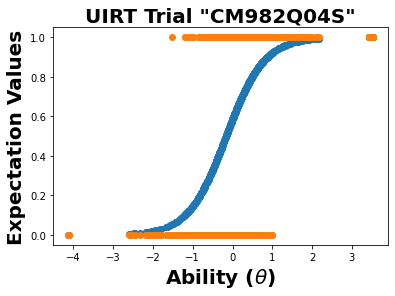

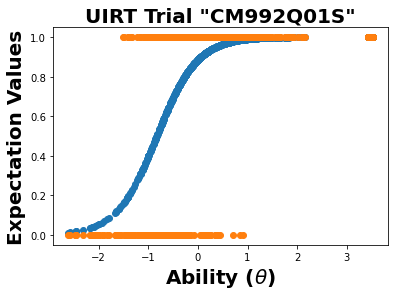

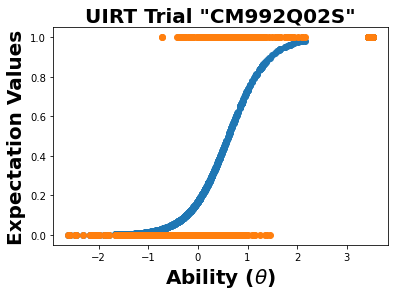

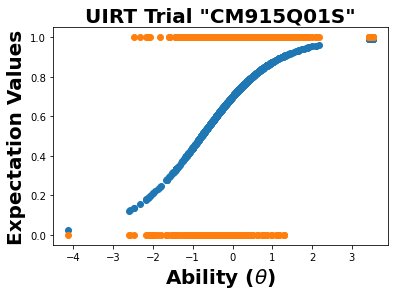

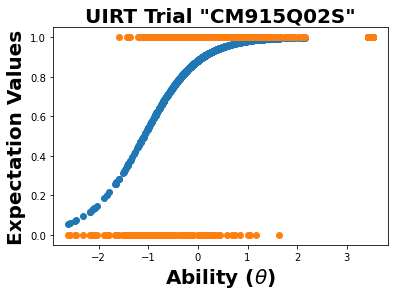

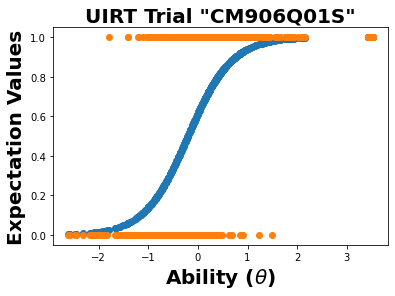

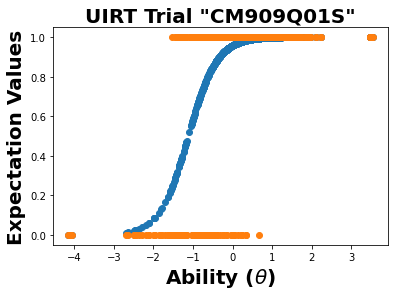

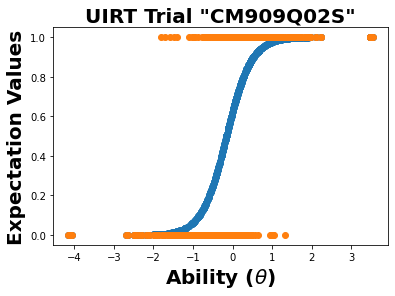

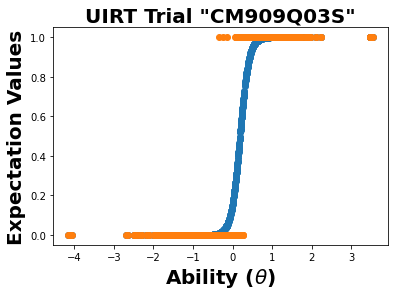

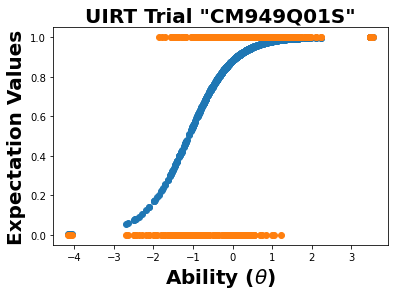

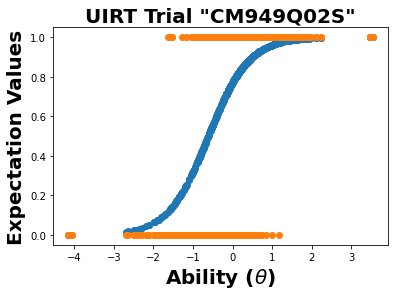

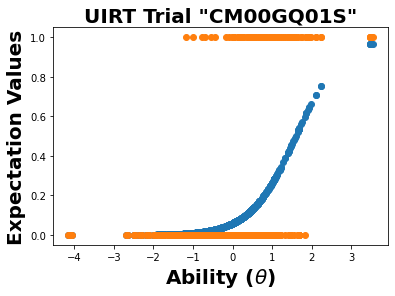

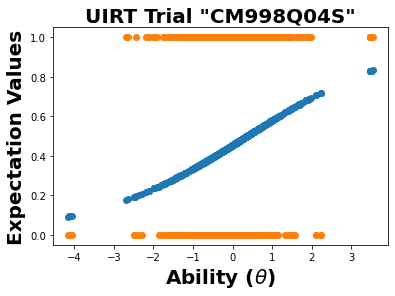

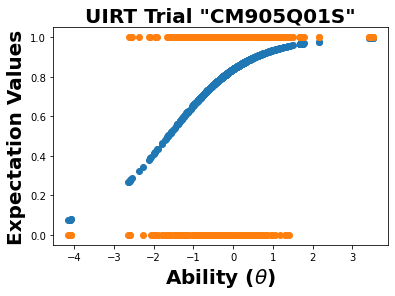

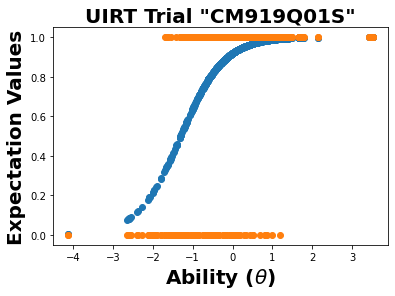

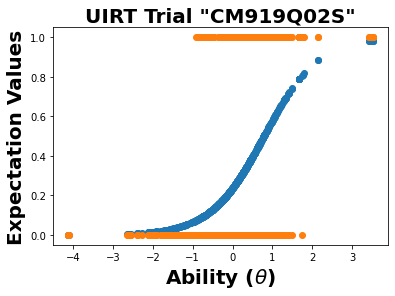

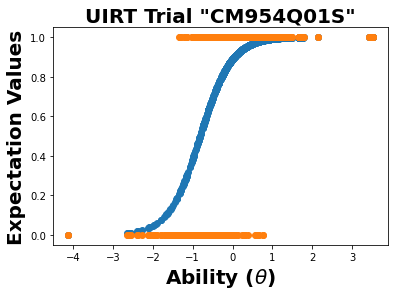

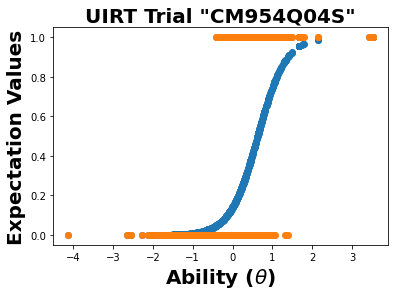

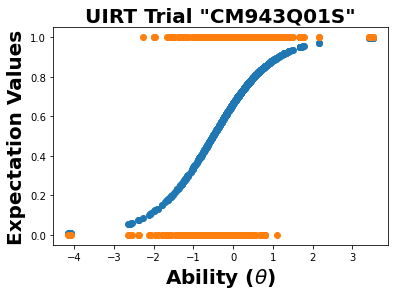

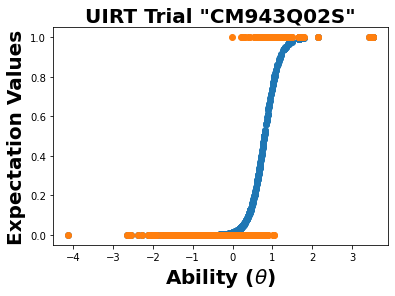

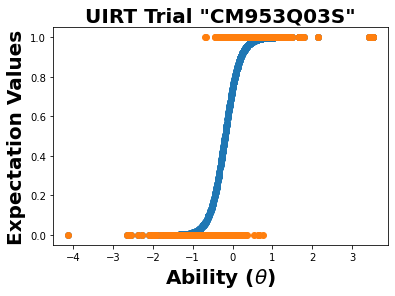

In [50]:
# Plotting Trial Multi Columns

xs = DataSet[0].tolist()
#print(xs)

for n in range(columcolum.shape[0]):
    Tough_in = DataSet[[0, n+1, n+52]]
    rough_in = Tough_in.dropna(axis=0)
    
    xs = rough_in[0].tolist()
    ys = rough_in[n+1].tolist()
    zs = rough_in[n+52].tolist()
    plt.scatter(x=xs, y=ys)
    plt.scatter(x=xs, y=zs)
    
    plt.title('UIRT Trial "%s"' %columcolum[n], fontdict={'weight': 'bold', 'size': 20})
    plt.xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 20})
    plt.ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 20})
    plt.show()


In [51]:
alpha_2 = alpha_1.tolist()
#print(alpha_2)
print(alpha_2[0][1])
rank = 1
print(alpha_2[0][rank])
beta_2 = beta_1.tolist()
print(beta_2[0][2])

0.9684116539548033
0.9684116539548033
-1.0598162565091303


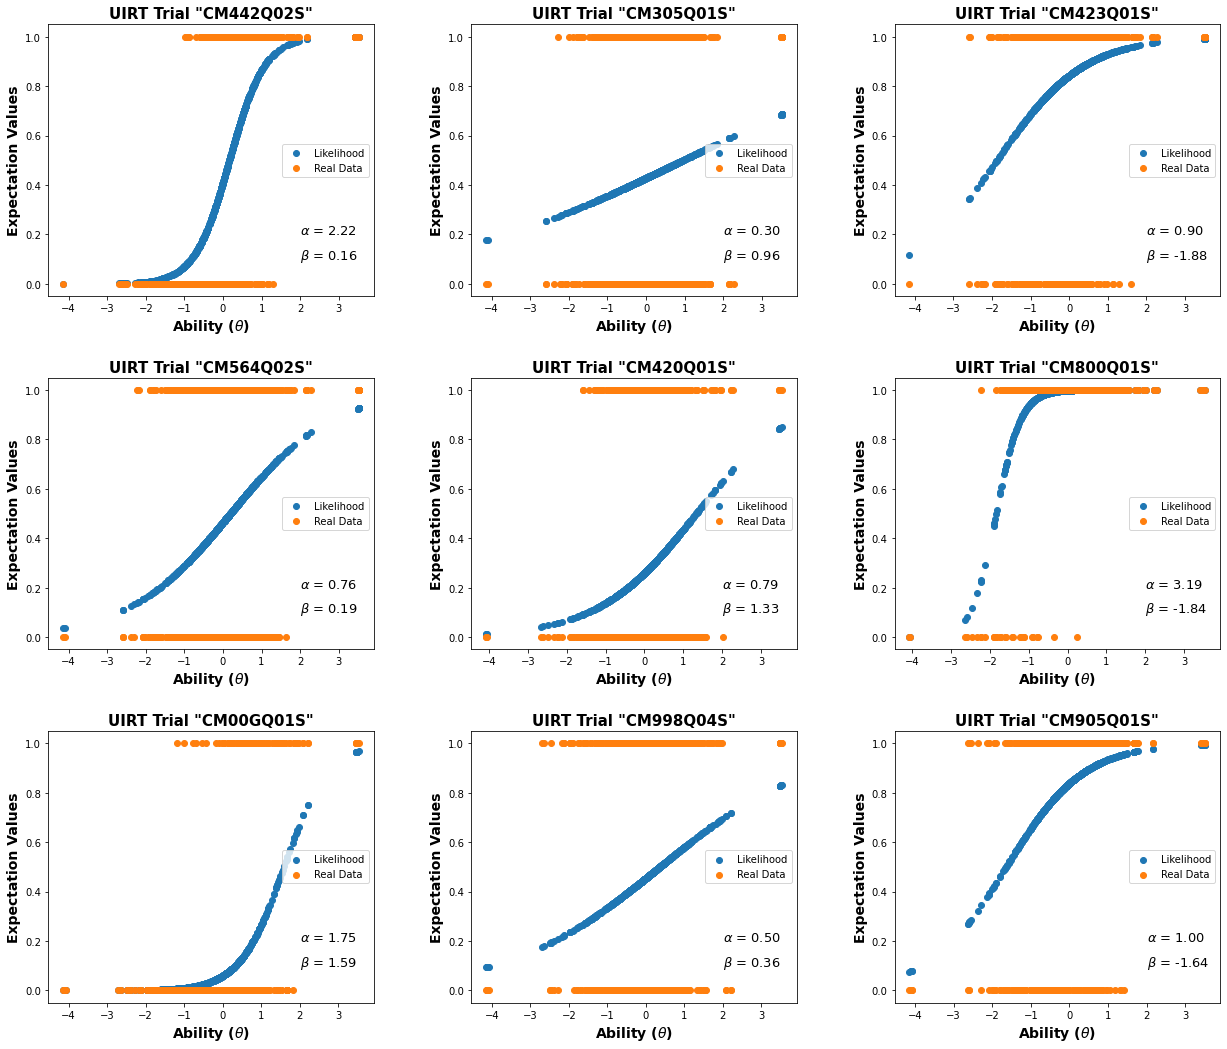

In [52]:
# 선별된 문항들 집중 분석 (likelihood 방식으로 잘된 것 1개, 찌그러진거 8개)

f, axes = plt.subplots(3, 3)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((21, 18))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 선택받은 문항 번호
Liszt = [8, 10, 13, 18, 22, 27, 42, 43, 44]
    
for n in Liszt:
    Tough_fin = DataSet[[0, n, n+51]]
    rough_fin = Tough_fin.dropna(axis=0)
    rank = n - 1
    
    xs = rough_fin[0].tolist()
    ys = rough_fin[n].tolist()
    zs = rough_fin[n+51].tolist()
    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')
    
    axes[garo, sero].set_title('UIRT Trial "%s"' %columcolum[n-1], fontdict={'weight': 'bold', 'size': 15})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 14})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 14})
        
    axes[garo, sero].text(2, 0.2, r'$\alpha$ = {0:0.2f}'.format(alpha_2[0][rank]), size = 13)
    axes[garo, sero].text(2, 0.1, r'$\beta$ = {0:0.2f}'.format(beta_2[0][rank]), size = 13)
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 3
    sero = sero % 3


plt.show()

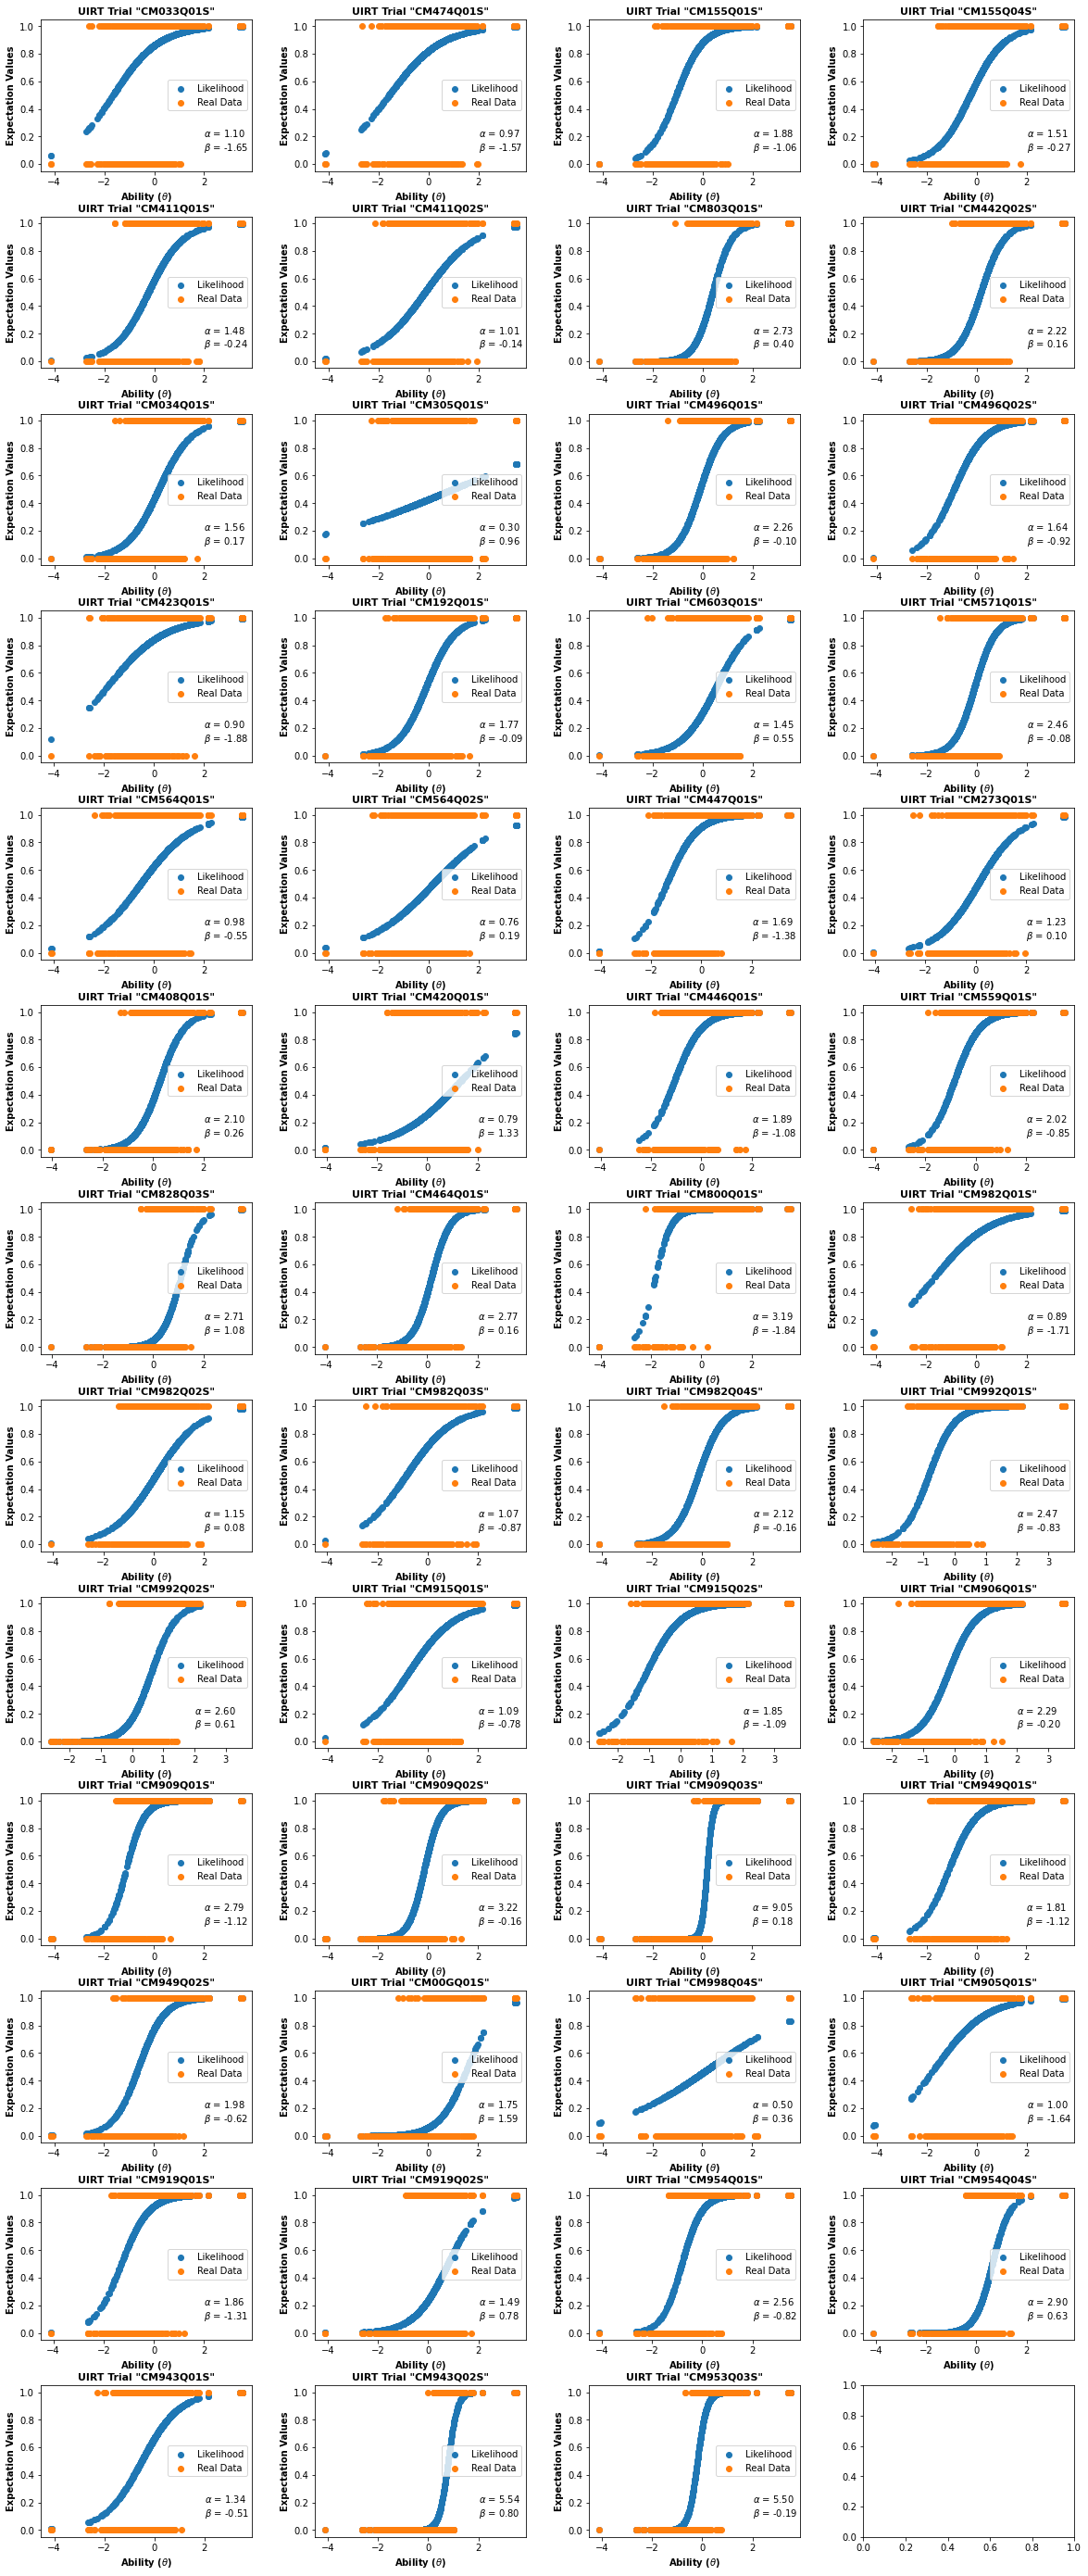

In [53]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for n in range(columcolum.shape[0]):
    Tough_fin = DataSet[[0, n+1, n+52]]
    rough_fin = Tough_fin.dropna(axis=0)
    
    xs = rough_fin[0].tolist()
    ys = rough_fin[n+1].tolist()
    zs = rough_fin[n+52].tolist()
    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')
    
    axes[garo, sero].set_title('UIRT Trial "%s"' %columcolum[n], fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
        
    axes[garo, sero].text(2, 0.2, r'$\alpha$ = {0:0.2f}'.format(alpha_2[0][rank]), size = 10)
    axes[garo, sero].text(2, 0.1, r'$\beta$ = {0:0.2f}'.format(beta_2[0][rank]), size = 10)
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4
    rank += 1


plt.show()

In [54]:
alpha_given_pre = pd.read_csv("alpha_LLH.csv")
beta_given_pre = pd.read_csv("beta_LLH.csv")
theta_given_pre = pd.read_csv("theta_LLH_T.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'alpha_LLH.csv'

In [78]:
theta_givenT_np = theta_given_pre.to_numpy()
mid_np = np.transpose(theta_givenT_np)
theta_given_np = mid_np[1:, :]
print(theta_given_np.shape)
print(theta_given_np)

(2727, 1)
[[ 1.33811548]
 [ 0.78464012]
 [ 0.65182431]
 ...
 [ 1.26623277]
 [-1.17835892]
 [ 0.17332202]]


In [79]:
alpha_mid1 = alpha_given_pre.to_numpy()
alpha_given_np = alpha_mid1[:, 1:]
#print(alpha_mid1)
#print(alpha_mid2)
beta_mid1 = beta_given_pre.to_numpy()
beta_given_np = beta_mid1[:, 1:]

In [80]:
DKL_LLH = set_D_KL(alpha_given_np, beta_given_np, theta_given_np)
print("Kullback Leibler Divergence calculated by LLH without w")
print(DKL_LLH)
print("")
print("Kullback Leibler Divergence calculated by DKL without w")
print(KLD_test)
print("")

Kullback Leibler Divergence calculated by LLH without w
16181.21324559706

Kullback Leibler Divergence calculated by DKL without w
16181.397104186946



In [94]:
print(theta_test)
print(theta_test.shape)
print(theta_given_np)
print(theta_given_np.shape)

[[ 1.29939715]
 [ 0.76309684]
 [ 0.63376338]
 ...
 [ 1.23050124]
 [-1.14462118]
 [ 0.17108525]]
(2727, 1)
[[ 1.33811548]
 [ 0.78464012]
 [ 0.65182431]
 ...
 [ 1.26623277]
 [-1.17835892]
 [ 0.17332202]]
(2727, 1)


In [95]:
x_1 = np.transpose(theta_given_np)
y_1 = np.transpose(theta_test)

In [86]:
import matplotlib.pylab as pylab

In [96]:
x = x_1[0, :]
y = y_1[0, :]

In [97]:
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화


In [91]:
from sklearn.metrics import r2_score

In [98]:
R2 = r2_score(x, y)
print(R2)

0.9993161890934099


Text(2, -3, '$R^2$ =0.999')

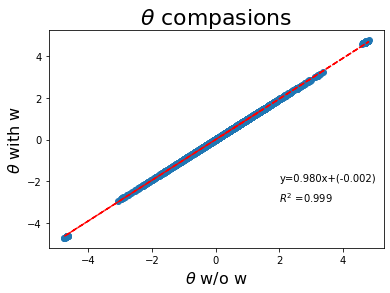

In [99]:
pylab.plot(x, y,'o')
pylab.plot(x,p(x),"r--")
pylab.xlabel(r'$\theta$' " w/o w", fontdict={'size': 16})
pylab.ylabel(r'$\theta$' " with w", fontdict={'size': 16})
pylab.title(r'$\theta$' " compasions", fontdict={'size': 22})
pylab.text(2,-2, "y=%.3fx+(%.3f)"%(z[0],z[1]), fontdict={'size': 10})
pylab.text(2,-3, r'$R^2$'" =%.3f"% R2, fontdict={'size': 10})